In [35]:
import numpy as np
import cv2
import glob
import csv
import matplotlib.pyplot as plt
import tensorflow as tf

In [36]:
images = {} #image_file:RGB
for file in glob.glob("./image/*"):
    im = cv2.imread(file) # BGR
    images[file] = im

1407
(720, 1280, 3)


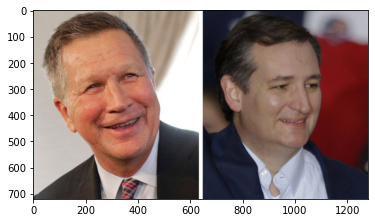

In [37]:
print(len(images.values()))
print(list(images.values())[0].shape)
plt.imshow(list(images.values())[0][:,:,[2,1,0]]) # conver to RGB

In [38]:
keys = list(images.keys())
for k in keys:
    square_length = min(len(images[k]), len(images[k][0]))
    images[k] = images[k][:square_length,:square_length,:]
    compress = int(square_length / 100)
    images[k] = images[k][::compress,::compress,[2,1,0]]
    if images[k].shape != (100, 100, 3):
        print(images[k].shape)
        images[k] = images[k][:100,:100,:]

(103, 103, 3)
(124, 124, 3)
(103, 103, 3)
(103, 103, 3)
(103, 103, 3)
(103, 103, 3)
(103, 103, 3)
(103, 103, 3)
(103, 103, 3)
(103, 103, 3)
(118, 118, 3)
(102, 102, 3)
(120, 120, 3)
(113, 113, 3)
(103, 103, 3)
(103, 103, 3)
(104, 104, 3)
(103, 103, 3)
(107, 107, 3)
(114, 114, 3)
(107, 107, 3)
(107, 107, 3)
(103, 103, 3)
(103, 103, 3)
(102, 102, 3)
(128, 128, 3)
(102, 102, 3)
(124, 124, 3)
(102, 102, 3)
(107, 107, 3)
(131, 131, 3)
(103, 103, 3)
(106, 106, 3)
(103, 103, 3)
(114, 114, 3)
(124, 124, 3)
(117, 117, 3)
(103, 103, 3)
(103, 103, 3)
(103, 103, 3)
(103, 103, 3)
(103, 103, 3)
(103, 103, 3)
(120, 120, 3)
(103, 103, 3)
(103, 103, 3)
(103, 103, 3)
(139, 139, 3)
(103, 103, 3)
(103, 103, 3)
(124, 124, 3)
(103, 103, 3)
(120, 120, 3)
(103, 103, 3)
(103, 103, 3)
(133, 133, 3)
(114, 114, 3)
(124, 124, 3)
(112, 112, 3)
(143, 143, 3)
(104, 104, 3)
(124, 124, 3)
(187, 187, 3)
(103, 103, 3)
(103, 103, 3)
(103, 103, 3)
(113, 113, 3)
(115, 115, 3)
(103, 103, 3)
(103, 103, 3)
(103, 103, 3)
(103, 

ValueError: slice step cannot be zero

In [33]:
import sys
csv.field_size_limit(sys.maxsize)


X_data = [] #image
Y_data = [] #subjectivity

i = 0
with open('./imagemodel_dataset.csv', 'r') as csvreader:
    reader = csv.DictReader(csvreader)
    for row in reader:
        file_name = "./image/" + row['id'] + ".jpg"
        target = row['subjectivity']
        try:
            X_data.append(images[file_name])
            Y_data.append(float(target))
            i += 1
        except:
            print(file_name)

./image/82595.jpg
./image/82602.jpg
./image/82617.jpg
./image/82624.jpg
./image/82631.jpg
./image/82635.jpg
./image/82639.jpg
./image/82640.jpg
./image/82643.jpg
./image/82648.jpg
./image/82655.jpg
./image/82658.jpg
./image/82665.jpg
./image/82668.jpg
./image/82673.jpg
./image/82675.jpg
./image/82678.jpg
./image/82679.jpg
./image/82681.jpg
./image/82684.jpg
./image/82721.jpg
./image/82723.jpg
./image/82744.jpg
./image/82746.jpg
./image/82751.jpg
./image/82755.jpg
./image/82756.jpg
./image/82770.jpg
./image/82780.jpg
./image/82781.jpg
./image/82793.jpg
./image/82808.jpg
./image/82813.jpg
./image/82814.jpg
./image/82815.jpg
./image/82818.jpg
./image/82819.jpg
./image/82822.jpg
./image/82823.jpg
./image/82826.jpg
./image/82828.jpg
./image/82832.jpg
./image/82840.jpg
./image/82847.jpg
./image/82848.jpg
./image/82850.jpg
./image/82851.jpg
./image/82853.jpg
./image/82855.jpg
./image/82857.jpg
./image/82861.jpg
./image/82862.jpg
./image/82863.jpg
./image/82866.jpg
./image/82870.jpg
./image/82

In [34]:
print(len(X_data) == len(Y_data))
print(len(X_data))

True
1407


In [12]:
# INPUT SHAPE
print(X_data[0].shape)
# OUTPUT SHAPE
print(Y_data[0])

(100, 100, 3)
0.4443434343434344


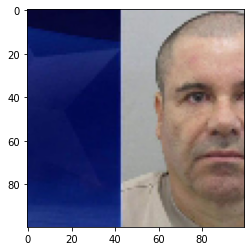

In [13]:
plt.imshow(X_data[75])

(array([  2.,   2.,   6.,   5.,  20.,  31.,  76., 116., 173., 292., 285.,
        226., 102.,  49.,  13.,   4.,   1.,   2.,   0.,   2.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

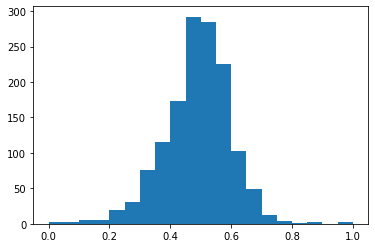

In [14]:
Y_data_norm = [(a-min(Y_data))/(max(Y_data) - min(Y_data)) for a in Y_data]
plt.hist(Y_data_norm, bins = 20)

In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(128,(3,3), activation="relu", input_shape=X_data[0].shape))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(.1))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation="sigmoid"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1))

In [40]:
model.compile(loss=tf.keras.losses.mean_squared_error,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['mse'])

In [41]:
X_data_norm = tf.cast(np.asarray(X_data), tf.float64)/255
X_train = X_data_norm[5:]
Y_train = Y_data_norm[5:]
X_test = X_data_norm[:5]
Y_test = Y_data_norm[:5]

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [42]:
plt.imshow(X_test[1])
print(Y_test[1])

NameError: name 'X_test' is not defined

In [43]:
model.fit(X_train, np.asarray(Y_train),
        validation_data=(np.asarray(X_test), np.asarray(Y_test)),
        batch_size = 32,
        epochs=4,
        verbose=2)

NameError: name 'X_train' is not defined

In [44]:
plt.imshow(X_test[1])
print(Y_test[1])

NameError: name 'X_test' is not defined

In [25]:
Y_predict = model.predict(tf.cast(np.asarray(X_test), tf.float64))
print(Y_predict)

NameError: name 'X_test' is not defined